<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 02</o>: <m>(__Num 4 ML__)</m>

> <c>Linear Algebra tools</c>




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
%matplotlib inline

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

`1.` __<c>$p$-Norms</c>__

$$ \|x\|_p = (\sum\limits_{i=1}^{n} |x_i|^p)^{\frac{1}{p}} $$

In [3]:
def PNorms(x,p,Ax):
    if type(p) is not int:
        raise TypeError("Please enter p as integer.")
    else:
        return np.sum(np.abs(x)**p,axis=Ax)**(1/p)


In [7]:
a = np.linspace(0,1)
PNorms(a,10,Ax=0)

1.1739487200606995

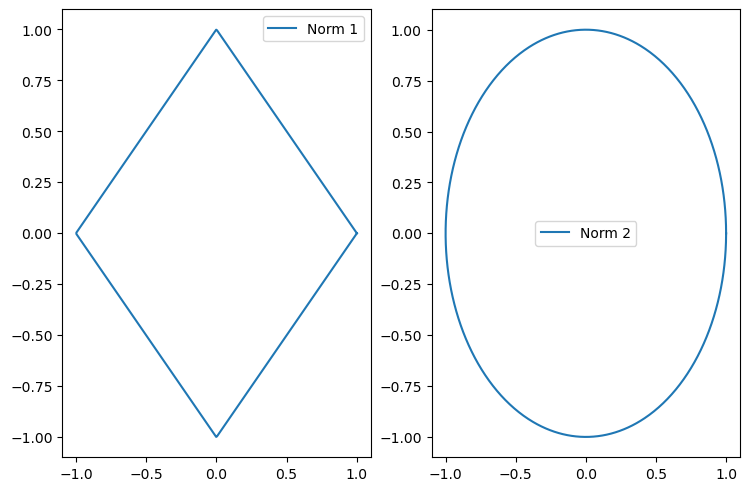

In [55]:
theta = np.linspace(0,2*np.pi,num=1000,endpoint=True)
x = np.cos(theta)
y = np.sin(theta)

Vectors = np.array([x,y])
Norms1 = PNorms(Vectors,1,Ax=0)
Norms2 = PNorms(Vectors,2,Ax=0)
NormalVectors1 = Vectors/Norms1
NormalVectors2 = Vectors/Norms2
fig = plt.figure(figsize=plt.figaspect(0.65),layout="constrained")
ax = fig.add_subplot(1,2,1)
ax.plot(NormalVectors1[0],NormalVectors1[1],label="Norm 1")
ax2 = fig.add_subplot(1,2,2)
ax2.plot(NormalVectors2[0],NormalVectors2[1],label="Norm 2")
ax.legend()
ax2.legend()
plt.show()

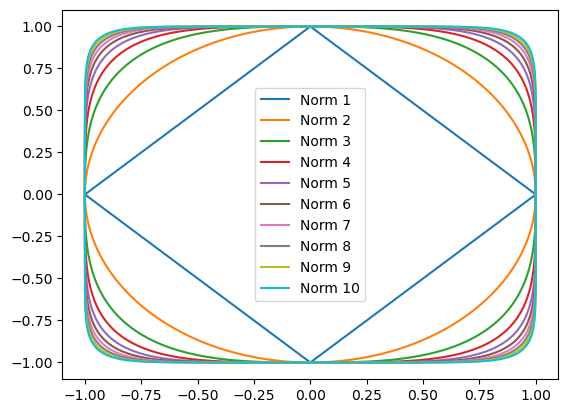

In [56]:
for i in range(10):
    NormalVectors = Vectors/PNorms(Vectors,i+1,Ax=0)
    plt.plot(NormalVectors[0],NormalVectors[1],label=f"Norm {i+1}")

plt.legend()
plt.show()

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

`2.` __<c>Frobenius norm</c>__

$$ \|A\|_F = \sqrt{\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{d} a_{ij}^2} $$

In [8]:
A = np.arange(0,12).reshape(3,4)
def FrobNorm(x):
    n,d = x.shape
    res = 0.0
    for i in range(n):
        for j in range(d):
            res += x[i,j]**2
    
    return res**0.5


In [9]:
FrobNorm(A)

22.494443758403985

In [10]:
np.linalg.norm(A,'fro')

22.494443758403985

In [11]:
B = np.arange(0,1e7).reshape(1000,10000)
FrobNorm(B)

18257417214.209602

In [12]:
np.linalg.norm(B,'fro')

18257417214.19986

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

`3.` __<c> Positive Definiteness </c>__

$$ x^T A x > 0 $$

In [15]:
np.random.seed(100)
C = np.random.randn(4**2).reshape(4,4)
D = np.dot(C.T,C)

Vals,Vecs = np.linalg.eig(D)

s = np.random.randn(4)
res = s.T.dot(D.dot(s))
print(f"Eignvalues {Vals}, EignVectors {Vecs}.")

Eignvalues [5.85333498 2.54129022 0.05538265 0.51500909], EignVectors [[-0.83228198  0.36367922 -0.4163401   0.04129239]
 [ 0.21111195  0.42251577  0.03440455  0.88075451]
 [ 0.51257128  0.41224912 -0.69365863 -0.29352862]
 [-0.00302313 -0.72060289 -0.58678356  0.36933371]].


<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

<o> **Problem** </o>

Show the approximation error of below computation:
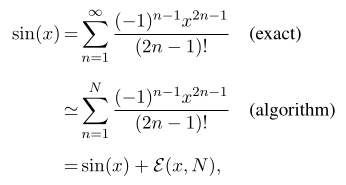

In [16]:
def Approx(n,x):
    return ((-1)**(n-1)*x**(2*n-1))/(factorial(2*n-1))

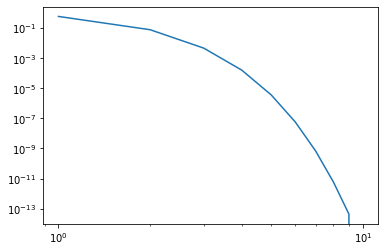

In [21]:
res = 0.0
Error = []
N = 10
for i in range(N):
    res += Approx(n=i+1,x=np.pi/2)
    Error.append(abs(res - np.sin(np.pi/2)))


#plt.plot(list(range(N)),Error)
plt.loglog(list(range(1,N+1)),Error)
plt.show()

In [2]:
isinstance(3,int)

True